In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [39]:
data = pd.read_csv("../data/merged_data.csv")

In [40]:
data.dropna(axis=0,subset=["%"],inplace=True)
data.reset_index(drop=True,inplace=True)

Encoding categorical variables

In [41]:
X = data[['Nation', 'Pos', 'Age', 'Min_Playing', 'Gls', 'Ast',
       'CrdY', 'CrdR','winner_Bundesliga',
       'winner_C3', 'finalist_C3', 'winner_UCL', 'finalist_UCL',
       'winner_Club WC', 'finalist_Club WC', 'winner_Copa America',
       'finalist_Copa America', 'winner_Euro', 'finalist_Euro', 'winner_Liga',
       'winner_Ligue 1', 'winner_PL', 'winner_Serie A', 'winner_WC',
       'finalist_WC']]
y1 = data[['%']].astype(float)
y2 = data[['Rang']]

In [42]:
import sklearn.preprocessing

encoder = sklearn.preprocessing.OneHotEncoder(sparse=False)
X = pd.concat([X,pd.DataFrame(encoder.fit_transform(X[['Pos']]),columns=encoder.categories_)],axis=1)
X.drop("Pos",axis=1,inplace=True)

X = pd.concat([X,pd.DataFrame(encoder.fit_transform(X[['Nation']]),columns=encoder.categories_)],axis=1)
X.drop("Nation",axis=1,inplace=True)


Train test split

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.3, random_state=0)
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.3, random_state=0)

Preprocessing

In [44]:
categorical_variables = ['winner_Bundesliga',             'winner_C3',
                 'finalist_C3',            'winner_UCL',
                'finalist_UCL',        'winner_Club WC',
            'finalist_Club WC',   'winner_Copa America',
       'finalist_Copa America',           'winner_Euro',
               'finalist_Euro',           'winner_Liga',
              'winner_Ligue 1',             'winner_PL',
              'winner_Serie A',             'winner_WC',
                 'finalist_WC',                 ('DF',),
                    ('DF,MF',),                 ('FW',),
                    ('FW,MF',),                 ('GK',),
                       ('MF',),              ('MF,FW',),
                      ('ALG',),                ('ARG',),
                      ('BEL',),                ('BIH',),
                      ('BRA',),                ('BUL',),
                      ('CHI',),                ('CIV',),
                      ('CMR',),                ('COL',),
                      ('CRO',),                ('CZE',),
                      ('DEN',),                ('EGY',),
                      ('ENG',),                ('ESP',),
                      ('FIN',),                ('FRA',),
                      ('GAB',),                ('GER',),
                      ('GHA',),                ('GRE',),
                      ('IRL',),                ('ITA',),
                      ('KOR',),                ('LBR',),
                      ('MLI',),                ('NED',),
                      ('NGA',),                ('POL',),
                      ('POR',),                ('ROU',),
                      ('SEN',),                ('SRB',),
                      ('SVN',),                ('TOG',),
                      ('TRI',),                ('URU',),
                      ('WAL',)]

numeric_variables = ['Age',           'Min_Playing',
                         'Gls',                   'Ast',
                        'CrdY',                  'CrdR']

In [325]:
X_train.isna().sum()

Age                      0
Min_Playing              0
Gls                      0
Ast                      5
CrdY                     0
CrdR                     0
winner_Bundesliga        0
winner_C3                0
finalist_C3              0
winner_UCL               0
finalist_UCL             0
winner_Club WC           0
finalist_Club WC         0
winner_Copa America      0
finalist_Copa America    0
winner_Euro              0
finalist_Euro            0
winner_Liga              0
winner_Ligue 1           0
winner_PL                0
winner_Serie A           0
winner_WC                0
finalist_WC              0
(DF,)                    0
(DF,MF,)                 0
(FW,)                    0
(FW,MF,)                 0
(GK,)                    0
(MF,)                    0
(ARG,)                   0
(BRA,)                   0
(CRO,)                   0
(ENG,)                   0
(ESP,)                   0
(FRA,)                   0
(GER,)                   0
(ITA,)                   0
(

In [326]:
X_test.isna().sum()

Age                      0
Min_Playing              0
Gls                      0
Ast                      2
CrdY                     0
CrdR                     0
winner_Bundesliga        0
winner_C3                0
finalist_C3              0
winner_UCL               0
finalist_UCL             0
winner_Club WC           0
finalist_Club WC         0
winner_Copa America      0
finalist_Copa America    0
winner_Euro              0
finalist_Euro            0
winner_Liga              0
winner_Ligue 1           0
winner_PL                0
winner_Serie A           0
winner_WC                0
finalist_WC              0
(DF,)                    0
(DF,MF,)                 0
(FW,)                    0
(FW,MF,)                 0
(GK,)                    0
(MF,)                    0
(ARG,)                   0
(BRA,)                   0
(CRO,)                   0
(ENG,)                   0
(ESP,)                   0
(FRA,)                   0
(GER,)                   0
(ITA,)                   0
(

In [45]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=4, weights="uniform")
X_train = pd.DataFrame(imputer.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(imputer.fit_transform(X_test),columns=X_test.columns)

C:\Users\charl\miniconda3\envs\BallondOr\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\charl\miniconda3\envs\BallondOr\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\charl\miniconda3\envs\BallondOr\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\charl\miniconda3\envs\BallondOr\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An er

In [11]:
X_train.dtypes.unique()

array([dtype('float64')], dtype=object)

Model building

In [12]:
X_train.shape

(356, 69)

In [13]:
y1_train.shape

(356, 1)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score


linear_regression = cross_val_score(LinearRegression(), X_train, y1_train, cv=10,scoring='neg_root_mean_squared_error')
ridge = RidgeCV(alphas = np.linspace(10,30),cv=10,scoring='neg_root_mean_squared_error').fit(X_train,y1_train)
lasso = LassoCV(alphas = np.linspace(1,2),cv=10,random_state=0).fit(X_train,y1_train)

C:\Users\charl\miniconda3\envs\BallondOr\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\charl\miniconda3\envs\BallondOr\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\charl\miniconda3\envs\BallondOr\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\charl\miniconda3\envs\BallondOr\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An er

Linear Regression

In [111]:
print("Validation RMSE : "+str(abs(linear_regression.mean()))+ " ("+str(abs(linear_regression.mean()*100/y1_train['%'].mean()))+"% of the mean)")

Validation RMSE : 6.607430286801756 (171.2829210230899% of the mean)


C:\Users\charl\miniconda3\envs\BallondOr\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\charl\miniconda3\envs\BallondOr\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\charl\miniconda3\envs\BallondOr\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\charl\miniconda3\envs\BallondOr\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An er

[ 38  76 114 152 190 228 266 304 342 381]


C:\Users\charl\miniconda3\envs\BallondOr\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\charl\miniconda3\envs\BallondOr\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\charl\miniconda3\envs\BallondOr\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\charl\miniconda3\envs\BallondOr\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An er

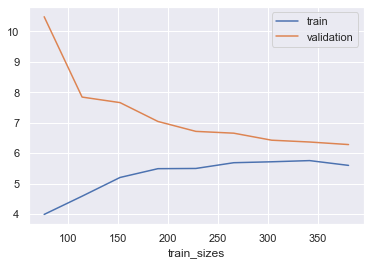

In [51]:
from sklearn.model_selection import learning_curve

N, train_score, val_score = learning_curve(LinearRegression(), X_train,y1_train, train_sizes=np.linspace(0.1,1,10),cv=10,scoring='neg_root_mean_squared_error')
print(N)
plt.plot(N[1:], abs(train_score.mean(axis=1))[1:],label="train")
plt.plot(N[1:], abs(val_score.mean(axis=1))[1:], label="validation")
plt.xlabel('train_sizes')
plt.legend()

Ridge Regression

In [24]:
ridge.alpha_

10.0

In [25]:
pd.DataFrame(ridge.coef_,columns=X_train.columns).T

,0
Age,0.001736
Min_Playing,-0.001072
Gls,0.390206
Ast,0.201408
CrdY,-0.060451
...,...
"(SVN,)",0.000000
"(TOG,)",0.000000
"(TRI,)",-0.607096
"(URU,)",-1.168482


In [26]:
print("ridge training r² : "+str(ridge.score(X_train,y1_train)))
print("ridge validation rmse : "+str(ridge.best_score_) +" ("+str(abs(ridge.best_score_*100/y1_train['%'].astype(float).mean()))+"% of the mean)")

ridge training r² : 0.41319044074125033
ridge validation rmse : -6.468844639663979 (154.65412245748277% of the mean)


C:\Users\charl\miniconda3\envs\BallondOr\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


C:\Users\charl\miniconda3\envs\BallondOr\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\charl\miniconda3\envs\BallondOr\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\charl\miniconda3\envs\BallondOr\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\charl\miniconda3\envs\BallondOr\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An er

[ 32  64  96 128 160 192 224 256 288 320]


C:\Users\charl\miniconda3\envs\BallondOr\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\charl\miniconda3\envs\BallondOr\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\charl\miniconda3\envs\BallondOr\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\charl\miniconda3\envs\BallondOr\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An er

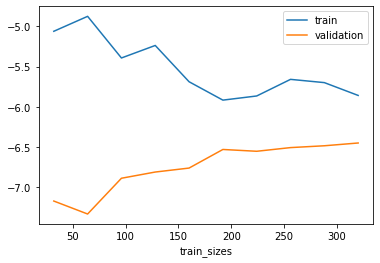

In [22]:
from sklearn.linear_model import Ridge
N, train_score, val_score = learning_curve(Ridge(alpha=ridge.alpha_), X_train,y1_train, train_sizes=np.linspace(0.1,1,10),cv=10,scoring='neg_root_mean_squared_error')
print(N)
plt.plot(N, train_score.mean(axis=1),label="train")
plt.plot(N, val_score.mean(axis=1), label="validation")
plt.xlabel('train_sizes')
plt.legend()

Lasso

In [379]:
lasso.alpha_

1.0

In [380]:
pd.DataFrame(lasso.coef_,columns=X_train.columns)

ValueError: Shape of passed values is (39, 1), indices imply (39, 39)

In [381]:
print("lasso training r² : "+str(lasso.score(X_train,y1_train)))


lasso training r² : 0.364654984676575


C:\Users\charl\miniconda3\envs\BallondOr\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


In [68]:
def noise(X, y, n, sigma):
    _X = X.copy()
    _y = y.copy()
    for _ in range(n):
        X = np.r_[X, _X + np.random.randn(*_X.shape)*sigma]
        y = np.r_[y, _y]
    return X, y

In [167]:
test_X, test_y = noise(X_train,y1_train,2,1)

In [168]:
linear_regression_2 = cross_val_score(LinearRegression(), test_X, test_y, cv=10,scoring='neg_root_mean_squared_error')
ridge_2 = RidgeCV(alphas = np.linspace(800,1500),cv=10,scoring='neg_root_mean_squared_error').fit(test_X,test_y.ravel())
lasso_2 = LassoCV(alphas = np.linspace(1,2),cv=10,random_state=0).fit(test_X,test_y.ravel())

In [169]:
print("Validation RMSE : "+str(abs(linear_regression_2.mean()))+ " ("+str(abs(linear_regression_2.mean()*100/test_y.mean()))+"% of the mean)")

Validation RMSE : 6.9605115999471865 (180.43576805274665% of the mean)


[ 114  228  343  457  572  686  800  915 1029 1144]


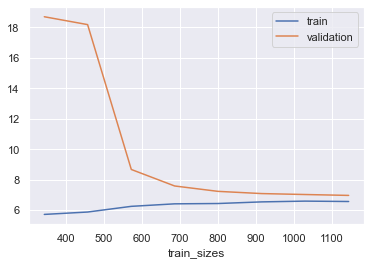

In [170]:
N, train_score, val_score = learning_curve(LinearRegression(), test_X,test_y, train_sizes=np.linspace(0.1,1,10),cv=10,scoring='neg_root_mean_squared_error')
print(N)
plt.plot(N[2:], abs(train_score.mean(axis=1))[2:],label="train")
plt.plot(N[2:], abs(val_score.mean(axis=1))[2:], label="validation")
plt.xlabel('train_sizes')
plt.legend()

In [171]:
ridge_2.alpha_

900.0

In [176]:
print("Validation RMSE : "+str(abs(ridge_2.best_score_))+ " ("+str(abs(ridge_2.best_score_*100/test_y.mean()))+"% of the mean)")

Validation RMSE : 6.832230250587704 (177.1103596447359% of the mean)


[ 114  228  343  457  572  686  800  915 1029 1144]


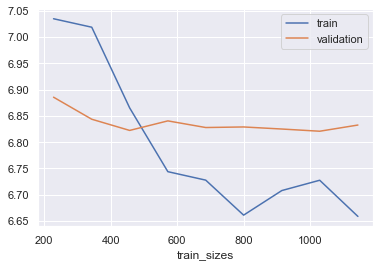

In [172]:
N, train_score, val_score = learning_curve(Ridge(ridge_2.alpha_), test_X,test_y, train_sizes=np.linspace(0.1,1,10),cv=10,scoring='neg_root_mean_squared_error')
print(N)
plt.plot(N[1:], abs(train_score.mean(axis=1))[1:],label="train")
plt.plot(N[1:], abs(val_score.mean(axis=1))[1:], label="validation")
plt.xlabel('train_sizes')
plt.legend()